In [143]:
# Useful starting lines
%matplotlib inline
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [193]:
def compute_mse_ridge(y, tx, w, lambda_):
    """compute the loss by mse."""
    e = y - tx.dot(w)
    mse = e.dot(e) / (2 * len(e)) 
    return mse

In [194]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    N = y.size
    w = npl.solve(tx.T @ tx + 2*N*lambda_, tx.T @ y)
    e = y - tx @ w
    mse = npl.norm(e, 2)**2 / (2*N) 
    return mse, w

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [257]:
from helpers import load_data

# load dataset
x, y = load_data()

In [184]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [185]:
def cross_validation(y, tx, n_folds, cost, function, **kwargs):
    '''return the best hyperparameter using the specified function.'''
    k_indices = build_k_indices(y, n_folds, 1)
    tx_folds = tx[k_indices]
    y_folds = y[k_indices]
    train = np.zeros(n_folds)
    folds_err = np.zeros(n_folds)
    for k in range(n_folds):
        tx_train = np.delete(tx_folds, k, axis=0).reshape(-1, tx.shape[1])
        y_train = np.delete(y_folds, k, axis=0).flatten()
        tx_test = tx_folds[k]
        y_test = y_folds[k]
        loss_train, w = function(y_train, tx_train, **kwargs)
        folds_err[k] = cost(y_test, tx_test, w, **kwargs)
        train[k] = loss_train
    average_loss = folds_err.mean()
    average_train = loss_train.mean()
    return average_loss, average_train

In [186]:
def cross_validation_generic(y, tx, n_folds, cost, function, **kwargs):
    '''return the best hyperparameter using the specified function.'''
    k_indices = build_k_indices(y, n_folds, 1)
    tx_folds = tx[k_indices]
    y_folds = y[k_indices]
    folds_err = np.zeros(n_folds)
    for k in range(n_folds):
        tx_train = np.delete(tx_folds, k, axis=0).reshape(-1, tx.shape[1])
        y_train = np.delete(y_folds, k, axis=0).flatten()
        tx_test = tx_folds[k]
        y_test = y_folds[k]
        _, w = function(y_train, tx_train, **kwargs)
        loss = cost(y_test, tx_test, w, **kwargs)
        folds_err[k] = loss
    average_loss = folds_err.mean()
    return average_loss

0

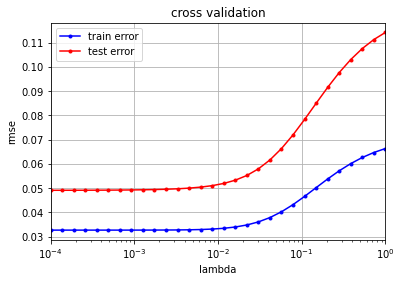

In [261]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    tx = build_poly(x, degree)
    rmse_tr = np.zeros(lambdas.size)
    rmse_te = np.zeros(lambdas.size)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************
    for i, lambda_ in enumerate(lambdas):
        rmse_te[i], rmse_tr[i] = cross_validation(y, tx, k_fold, compute_mse_ridge, ridge_regression, lambda_=lambda_)
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    return rmse_tr, rmse_te

rmse_tr, rmse_te = cross_validation_demo()
# plt.yscale('log')
np.argmin(rmse_te)

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

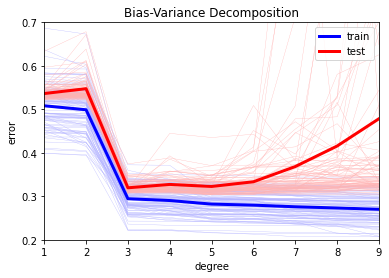

In [260]:
from least_squares import least_squares
from costs import compute_mse
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)

    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))

    for i, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        x_train, y_train, x_test, y_test = split_data(x, y, ratio_train, seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for j, degree in enumerate(degrees):
            tx_train = build_poly(x_train, degree)
            tx_test = build_poly(x_test, degree)
            mse_train, w = least_squares(y_train, tx_train)
            mse_test = compute_mse(y_test, tx_test, w)
            rmse_tr[i, j] = (2*mse_train)**0.5
            rmse_te[i, j] = (2*mse_test)**0.5

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()